In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['text.usetex'] = True

import numpy as np
import seaborn as sns
import pandas as pd
from parsers.parse_triqler import  parse_triqler
import argparse

from plot_histogram import *

In [26]:
def plot_histogram(df, bins = 50):
    fig, axs = plt.subplots(1, 1, figsize=(10,6))
    g = sns.histplot(data=df[df["FDR"] < 1], x="log2FC", hue="specie", kde = False, ax = axs, 
                    bins = np.histogram_bin_edges(df[df["FDR"] < 0.05].log2FC, 
                                                  bins=bins, range=(-2,3), weights=None))
    g.legend_.set_title(None)
    axs.set_xlim([-2, 3])
    axs.set_xlabel("log2 fold change", fontsize=34)
    axs.set_ylabel("Protein count", fontsize=34)
    
    plt.legend(loc='upper right', labels=['Yeast', "HeLa",  r'\textit{E.Coli}'])
    plt.setp(axs.get_legend().get_texts(), fontsize='30')
    
    axs.tick_params(axis='x', which='major', labelsize=32)#labelrotation=90)
    axs.tick_params(axis='y', which='major', labelsize=32)
    
    axs.axvline(x = 0, color = "orange", linestyle = "--", alpha = 0.4)
    axs.axvline(x = -1, color = "green", linestyle = "--", alpha = 0.4)
    axs.axvline(x = 2, color = "blue", linestyle = "--", alpha = 0.4)


specie_mapper = lambda x: x.split("_")[-1]

def read_triqler(triqler_file):
    df = parse_triqler(triqler_file)
    df["log2_fold_change"] = -df.log2_fold_change
    df["specie"] = df.protein.map(specie_mapper)
    df.rename({"log2_fold_change":"log2FC", "q_value":"FDR"}, axis = 1, inplace = True)
    df = df[~df.protein.str.contains("DECOY")]
    df.sort_values(by = ["specie"], inplace = True)
    return df


In [20]:
data_dir = "results_0.51_2022-05-10/ID/"
triqler_file = "triqler_results.csv"
df = read_triqler(data_dir + triqler_file)

In [21]:
zero_prots = df[df.log2FC == 0]


In [22]:
zero_prots

,protein,peptides,FDR,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2FC,diff_exp_prob_0.51,1:002-Pedro,1:004-Pedro,1:006-Pedro,2:003-Pedro,2:005-Pedro,2:007-Pedro,specie
3911,P0ADS2_ECOLI,MLQQTIEQALLEQGR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3910,P0ACB2_ECOLI,FAALAGAIDEEKVVLESLGSIKR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3909,P0AAD6_ECOLI,METTQTSTIASK,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3908,P0AA53_ECOLI,YTEALQQIGSSSNSK,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3907,P0A9R7_ECOLI,AVVNKPAVLLADEPTGNLDDALSEGILR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4002,Q04660_YEAST,VINSLGVLDAIWHPR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST
4003,Q05946_YEAST,ILATPVLDEINIIDLTPGSR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST
4004,Q06103_YEAST,VNGIVETNRPDNK,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST
4005,Q06287_YEAST,VGLSNYPLSASVAC(UniMod:4)SK;GKDNFADEYVDEK,0.6215,1.0,2.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST


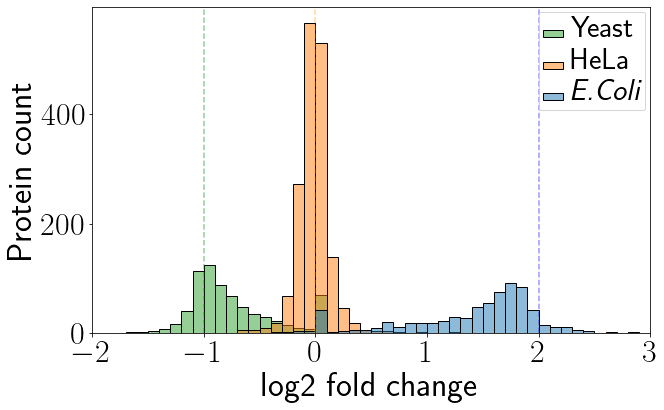

In [27]:
plot_histogram(df)

In [34]:
zero_prots # all sample quantity is 1

,protein,peptides,FDR,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2FC,diff_exp_prob_0.51,1:002-Pedro,1:004-Pedro,1:006-Pedro,2:003-Pedro,2:005-Pedro,2:007-Pedro,specie
3911,P0ADS2_ECOLI,MLQQTIEQALLEQGR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3910,P0ACB2_ECOLI,FAALAGAIDEEKVVLESLGSIKR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3909,P0AAD6_ECOLI,METTQTSTIASK,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3908,P0AA53_ECOLI,YTEALQQIGSSSNSK,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
3907,P0A9R7_ECOLI,AVVNKPAVLLADEPTGNLDDALSEGILR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ECOLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4002,Q04660_YEAST,VINSLGVLDAIWHPR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST
4003,Q05946_YEAST,ILATPVLDEINIIDLTPGSR,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST
4004,Q06103_YEAST,VNGIVETNRPDNK,0.6215,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST
4005,Q06287_YEAST,VGLSNYPLSASVAC(UniMod:4)SK;GKDNFADEYVDEK,0.6215,1.0,2.0,1.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,YEAST


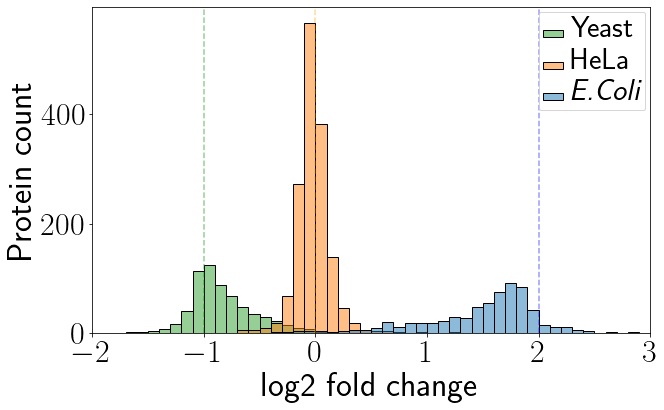

In [47]:
plot_histogram(df[~((df.iloc[:,df.columns.str.contains("Pedro")] == 1).sum(axis=1) == 6)])

In [48]:
(df[~((df.iloc[:,df.columns.str.contains("Pedro")] == 1).sum(axis=1) == 6)])

,protein,peptides,FDR,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2FC,diff_exp_prob_0.51,1:002-Pedro,1:004-Pedro,1:006-Pedro,2:003-Pedro,2:005-Pedro,2:007-Pedro,specie
0,P0AB71_ECOLI,DSVSYGVVK;AFQELNAIDVL;ANEAYLQGQLGNPK;APVIVQFSN...,0.000003,0.000003,26.0,2.710000e-07,1.9000,0.000003,0.5014,0.5259,0.5264,1.8370,1.9250,2.0370,ECOLI
538,P26646_ECOLI,NFPMIPGIDFAGTVR;EISLSEAPNFAEAIINNQIQGR;LVADLPE...,0.001192,0.004525,3.0,4.069000e-03,1.4110,0.000458,0.6655,0.5452,0.6406,1.4900,1.5890,1.8170,ECOLI
539,P0AFM6_ECOLI,SLEHEVTLVDDTLAR;FADIVNANINALLEK;RIDQMEAEAESHSF...,0.001198,0.004560,4.0,4.393000e-03,1.7580,0.000168,0.3091,0.6189,0.6967,1.8740,1.9210,2.0840,ECOLI
540,P0A761_ECOLI,AVVSVPIIGIVK;IEGVANLQATR,0.001204,0.004605,2.0,4.533000e-03,1.9000,0.000072,0.4568,0.5714,0.5480,1.8230,1.8390,2.0850,ECOLI
541,P0AGJ5_ECOLI,MVLVLGQEYEGLPDAARDPNDLR;GVVVQDAALLESGAAIR;TAEG...,0.001210,0.004671,3.0,4.618000e-03,2.3270,0.000053,0.3390,0.4030,0.7128,1.9900,2.2930,2.2520,ECOLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,Q04175_YEAST,DLASNLVEQFLR;SNEILYLILK;VSTNDELGLDSK,0.019240,0.141500,3.0,2.121000e-02,-0.8343,0.122900,1.3570,1.4600,1.4040,0.7895,0.5789,0.7863,YEAST
953,P18544_YEAST,AFQVTTYSRPEDLC(UniMod:4)ITR;VFLC(UniMod:4)NSGT...,0.019110,0.140200,2.0,5.562000e-02,-0.9557,0.089590,1.3310,1.6300,1.5550,0.5561,0.6058,0.8796,YEAST
952,P36112_YEAST,NLLQEVDEFKENLTK;ILSNEQIYNR;WNLLADDFK;LAHLEEINS...,0.018980,0.139900,7.0,2.913000e-03,-0.8100,0.137400,1.1530,1.6330,1.7290,0.3865,0.7711,1.0300,YEAST
949,P14906_YEAST,NLDIALGAINTFK;IPLGQPAPETVGDFFFR;ADFLVPGENQVTPS...,0.018600,0.134900,4.0,5.015000e-02,-0.8897,0.089240,1.2650,1.5430,1.3230,0.7589,0.6927,0.7366,YEAST
